In [3]:
import numpy as np
import math

array([-66, -69,  83,   5, -80])

In [ ]:
import findspark
findspark.init()

# create spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("my app").master("local").getOrCreate()

# get context from the session
sc = spark.sparkContext

In [81]:
import numpy as np
import math

def create_dataset(N, D=10, K=None):
    if K is None:
        K = math.ceil(math.sqrt(N)/2)
    
    def create_normal_dist(n):
        mu = np.random.randint(-100, 100, size=(D,)) / 100. * D

        L = np.random.randint(-70, 70, size=(D,D)) / 100.
        cov = np.dot(L, L.transpose())

        t = np.random.multivariate_normal(mu, cov, n)
        return t
    
    dataset = list()
    Csize = int(N / K)
    for _ in range(K):
        dataset_c = np.zeros((Csize, D+1))
        # gen IDs
        dataset_c[:, 0] = np.arange(Csize, dtype='int')
        dataset_c[:, 1:D+1] = create_normal_dist(Csize)
        dataset.extend(dataset_c)
    
    return np.array(dataset)

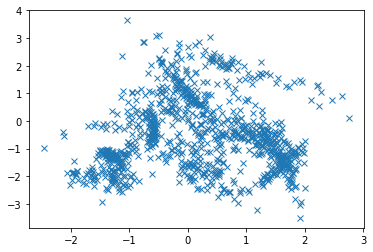

In [87]:
import matplotlib.pyplot as plt

ids, x1, y1 = create_dataset(1000, D=2).T
plt.plot(x1, y1, 'x')

# Test

In [1]:
N=10000
k=10

In [ ]:
dataset = create_dataset(N)

In [ ]:
rdd = sc.parallelize(dataset)\
        .